In [12]:
import os
from PIL import Image
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import PathPatch3D


In [10]:
# Parameters
image_folder = "/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/melonCycle/2024-07-30/A-1/images_4"  # Replace with your folder path
output_image = "combined_image.png"  # Name of the output file
resize_size = (50, 100)  # Set the size you want for each thumbnail image

columns = 6  # Number of images per row
rows = 4  # Number of rows (total 24 images)

# Get list of images in folder
image_files = [f for f in sorted(os.listdir(image_folder)) if f.endswith(('jpg', 'jpeg', 'png'))]

# Select every 10th image and limit to 24 images (6x4 grid)
selected_images = image_files[::10][:columns * rows]

# Load and resize images
images = [Image.open(os.path.join(image_folder, img)).resize(resize_size) for img in selected_images]

# Create a new blank image to paste all resized images into
combined_image = Image.new('RGB', (resize_size[0] * columns, resize_size[1] * rows))

# Paste images into the combined image
for idx, img in enumerate(images):
    x_offset = (idx % columns) * resize_size[0]
    y_offset = (idx // columns) * resize_size[1]
    combined_image.paste(img, (x_offset, y_offset))

# Save the combined image
combined_image.save(output_image)
print(f"Combined image saved as {output_image}")

Combined image saved as combined_image.png


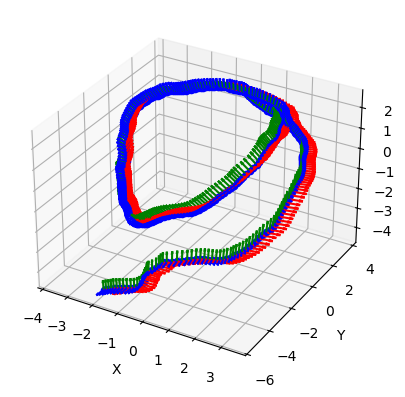

In [11]:


# Load the transforms.json file
with open('/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/melonCycle/2024-07-30/A-1/transforms.json') as f:
    data = json.load(f)

# Extract frames (which contain the transform matrices for each image)
frames = data['frames']

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Loop over each frame to extract the transform matrix and plot the pose
for frame in frames:
    transform_matrix = np.array(frame['transform_matrix'])
    
    # Extract the position (translation vector) from the last column
    position = transform_matrix[:3, 3]
    
    # Extract the orientation (rotation matrix)
    orientation = transform_matrix[:3, :3]
    
    # Define the length of the orientation vectors to visualize
    length = 0.5
    
    # Plot the position as a point
    ax.scatter(position[0], position[1], position[2], c='b')
    
    # Plot the orientation vectors as arrows
    ax.quiver(position[0], position[1], position[2], 
              orientation[0, 0], orientation[1, 0], orientation[2, 0], 
              length=length, color='r')  # X-axis (red)
    ax.quiver(position[0], position[1], position[2], 
              orientation[0, 1], orientation[1, 1], orientation[2, 1], 
              length=length, color='g')  # Y-axis (green)
    ax.quiver(position[0], position[1], position[2], 
              orientation[0, 2], orientation[1, 2], orientation[2, 2], 
              length=length, color='b')  # Z-axis (blue)

# Set plot labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

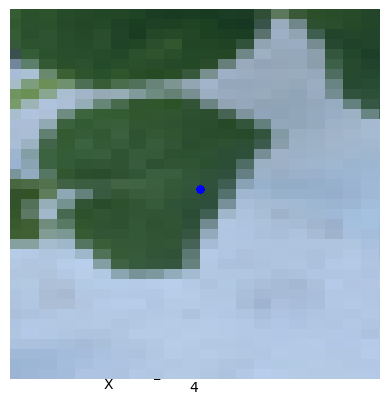

In [25]:
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Helper function to add an image to a 3D plot
def plot_image(ax, img, position, size=(0.5, 0.5)):
    img = np.array(img)
    img = np.flipud(img)  # Flip the image vertically for correct orientation
    x, y, z = position
    extent = [x - size[0]/2, x + size[0]/2, y - size[1]/2, y + size[1]/2]
    
    ax.imshow(img, extent=extent)

# Load the transforms.json file
with open('/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/melonCycle/2024-07-30/A-1/transforms.json') as f:
    data = json.load(f)

# Extract frames (which contain the transform matrices for each image)
frames = data['frames']

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scaling factor for the positions
scale_factor = 0.000000001  # Adjust this if your poses are on a very large scale

# Loop over every 10th frame to extract the transform matrix and plot the pose
for i, frame in enumerate(frames[::10]):
    transform_matrix = np.array(frame['transform_matrix'])
    
    # Extract the position (translation vector) from the last column and apply scaling
    position = transform_matrix[:3, 3] * scale_factor
    
    # Extract the orientation (rotation matrix)
    orientation = transform_matrix[:3, :3]
    
    # Define the length of the orientation vectors to visualize
    length = 0.5 * scale_factor  # Scale the length based on the same factor
    
    # Plot the position as a point
    ax.scatter(position[0], position[1], position[2], c='b')
    
    # Plot the orientation vectors as arrows
    ax.quiver(position[0], position[1], position[2], 
              orientation[0, 0], orientation[1, 0], orientation[2, 0], 
              length=length, color='r')  # X-axis (red)
    ax.quiver(position[0], position[1], position[2], 
              orientation[0, 1], orientation[1, 1], orientation[2, 1], 
              length=length, color='g')  # Y-axis (green)
    ax.quiver(position[0], position[1], position[2], 
              orientation[0, 2], orientation[1, 2], orientation[2, 2], 
              length=length, color='b')  # Z-axis (blue)

    # Load and display the corresponding image at the pose
    image_folder = "/Users/noahbucher/Documents_local/Plant_reconstruction/ppheno/data/melonCycle/2024-07-30/A-1/"
    image_path = frame['file_path']
    try:
        img = Image.open(f"{image_folder}{image_path}")
        img.thumbnail((100, 100))  # Resize the image to a smaller size
        plot_image(ax, img, position)  # Plot image at the pose position
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")

# Set plot limits based on expected range of positions (adjust if necessary)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)

# Set plot labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
